# Data Science Capstone Project

The dataset is related to heart attack prediction.

Goals:



1.   Exploring the dataset: Understanding the features, data types, and summary statistics
2.   Data preprocessing: Handling missing values.
3. Building a model: Creating a heart attack prediction model using a specific algorithm (e.g., logistic regression, decision trees, random forest, or neural networks)
4. Evaluating model performance: Assessing the model's accuracy


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
# Check if there is any missing value in the DataFrame
any_missing = df.isnull().any().any()
print(any_missing)

False


In [ ]:
df['target'] = (df['target'] >= 0.5).astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


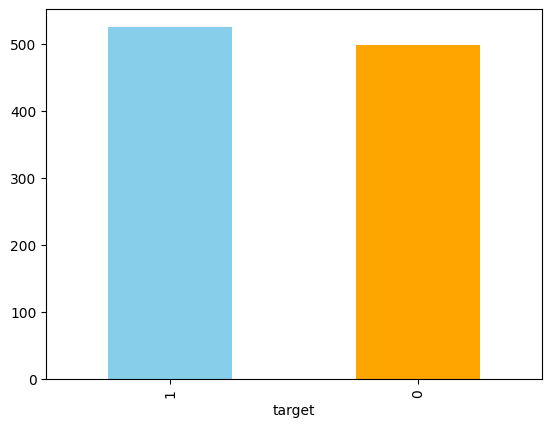

In [ ]:
df['target'].value_counts().plot(kind='bar',color=['skyblue', 'orange'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Analyzing the statistical values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Mapping the values of age: 25-29 = 0,30-34 = 1 and so on...

In [ ]:
bins_age = [i for i in range(25, 81, 5)]  # Define bins of size 5 from 25 to 80
labels_age = [f'{i}-{i+4}' for i in range(25, 76, 5)]  # Define labels for the bins

# Create a new column 'AgeBins' with the bins
df['AgeBins'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, include_lowest=True)

In [ ]:
df['AgeBins'].value_counts()

AgeBins
55-59    247
50-54    191
60-64    161
40-44    145
45-49    102
65-69     91
35-39     43
30-34     21
70-74     14
75-79      6
25-29      4
Name: count, dtype: int64

In [ ]:
# Mapping of 25-29 = 0,30-34 = 1 and so on...
df['AgeBins'] = df['AgeBins'].cat.codes

In [ ]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeBins
533,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1,5
288,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1,6
624,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,6
610,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,3
683,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0,3
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1,6
517,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1,3
939,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1,4
241,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,8
474,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0,4


In [ ]:
df.drop(columns=['age'],inplace=True)

Correlation Matrix

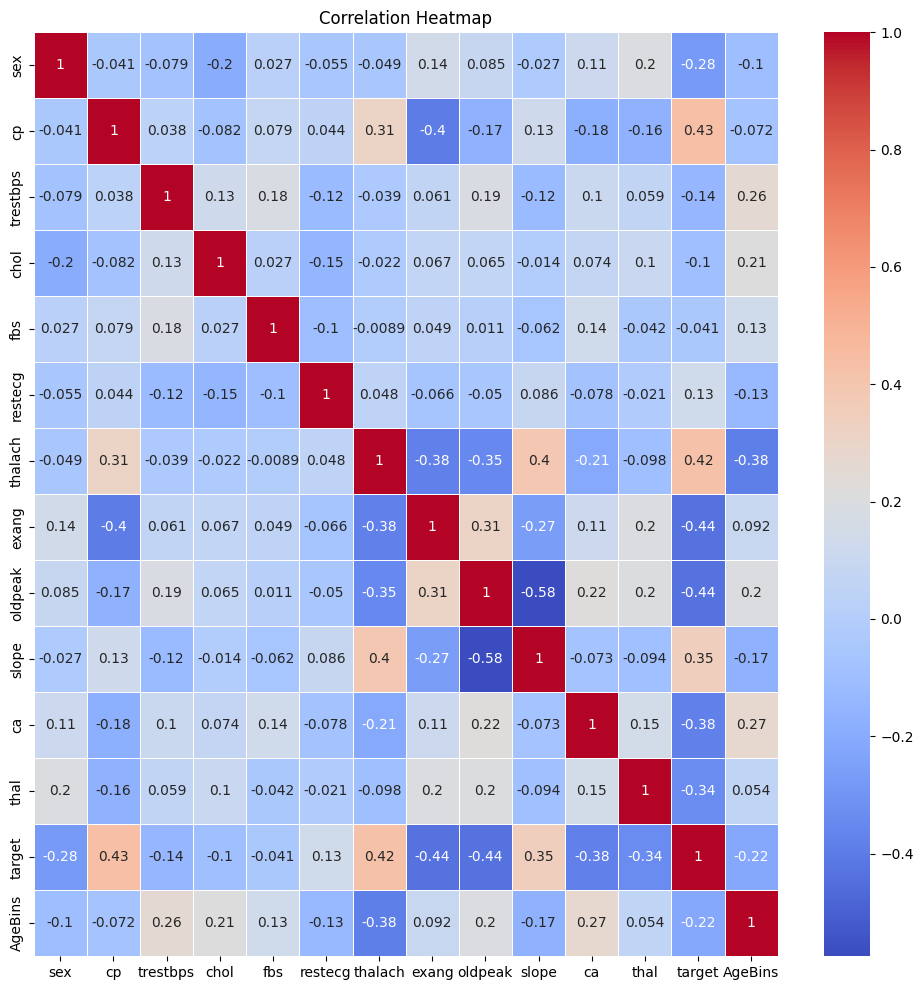

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Key Insights of Data**

Gender Distribution

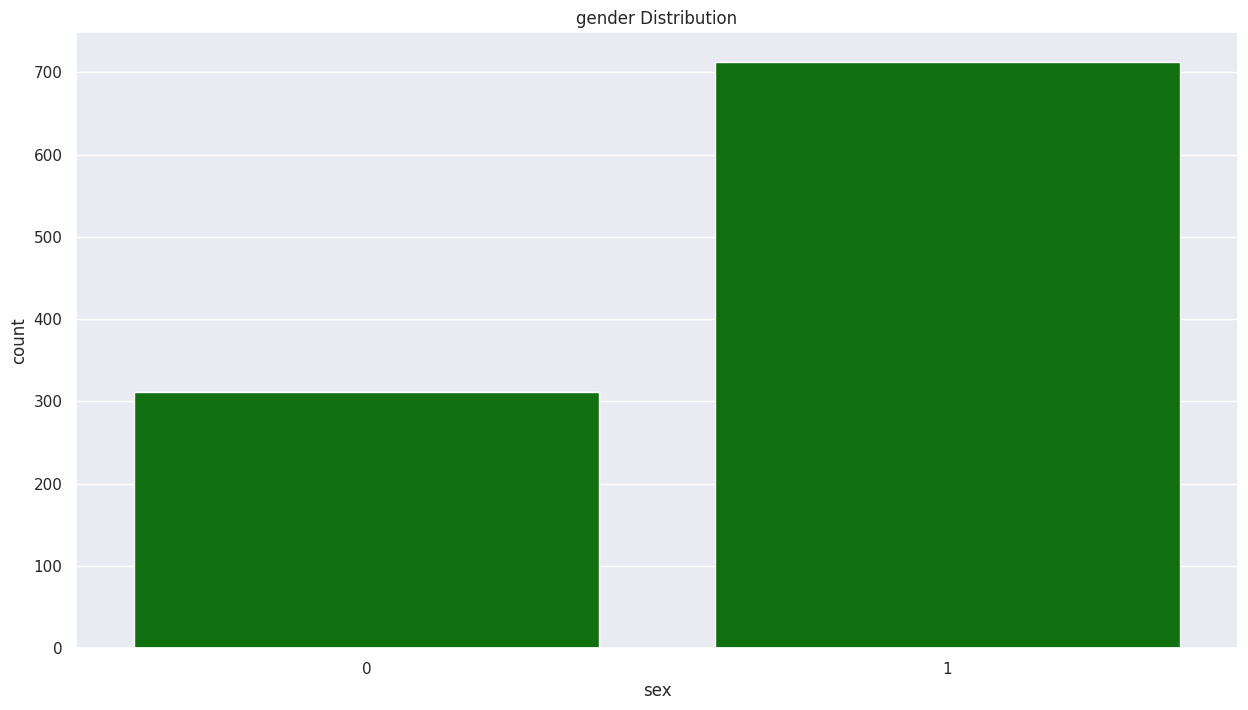

In [ ]:
sns.countplot(x = 'sex',data= df,color = 'green')
plt.title("gender Distribution")
plt.show()

Chest Pain Type distribution

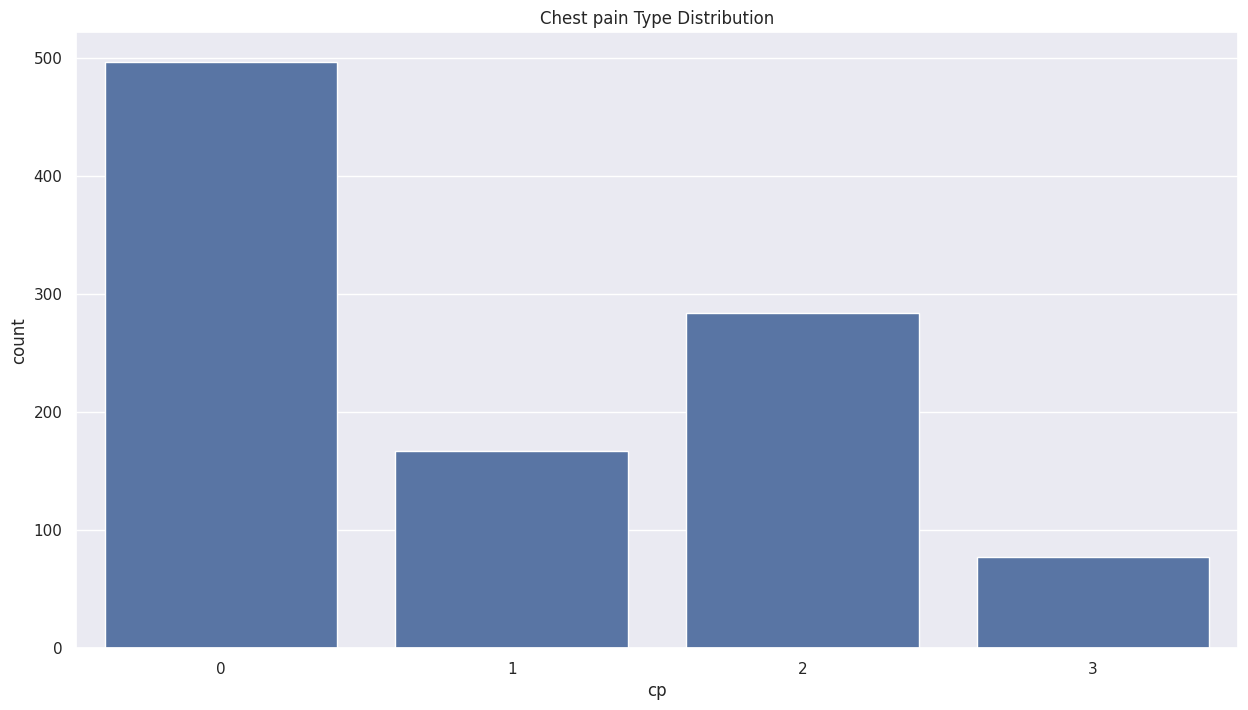

In [ ]:
sns.countplot(x = 'cp',data=df)
plt.title('Chest pain Type Distribution')
plt.show()

Cholesterol distribution

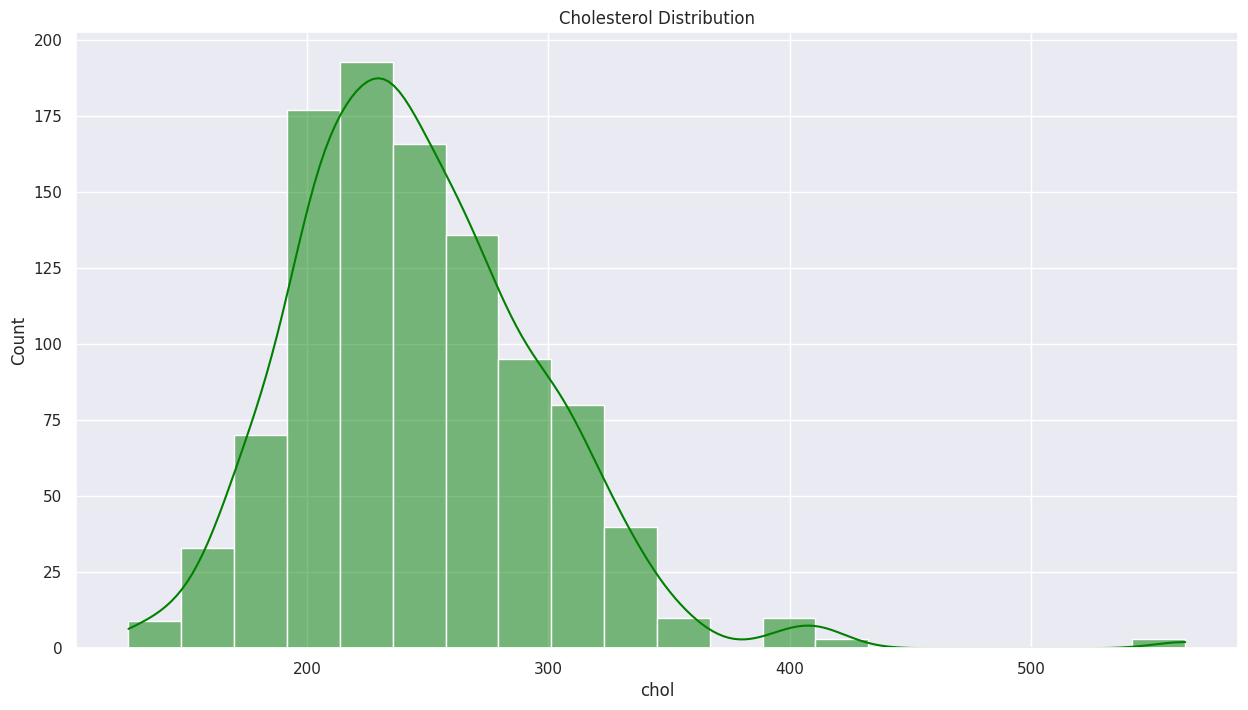

In [ ]:
sns.histplot(df['chol'], bins=20, kde=True,color = 'green')
plt.title('Cholesterol Distribution')
plt.show()

Maximum Heart Rate distribution

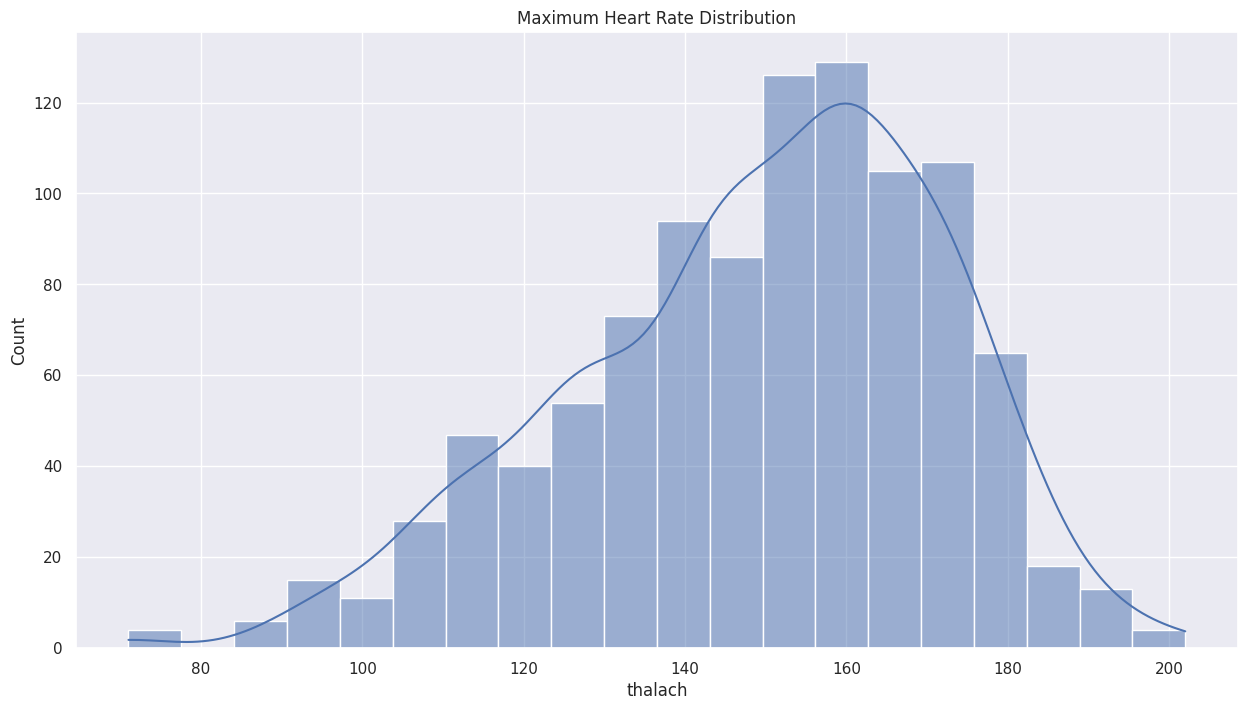

In [ ]:
sns.histplot(df['thalach'], bins=20, kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.show()

Thalassemia distribution

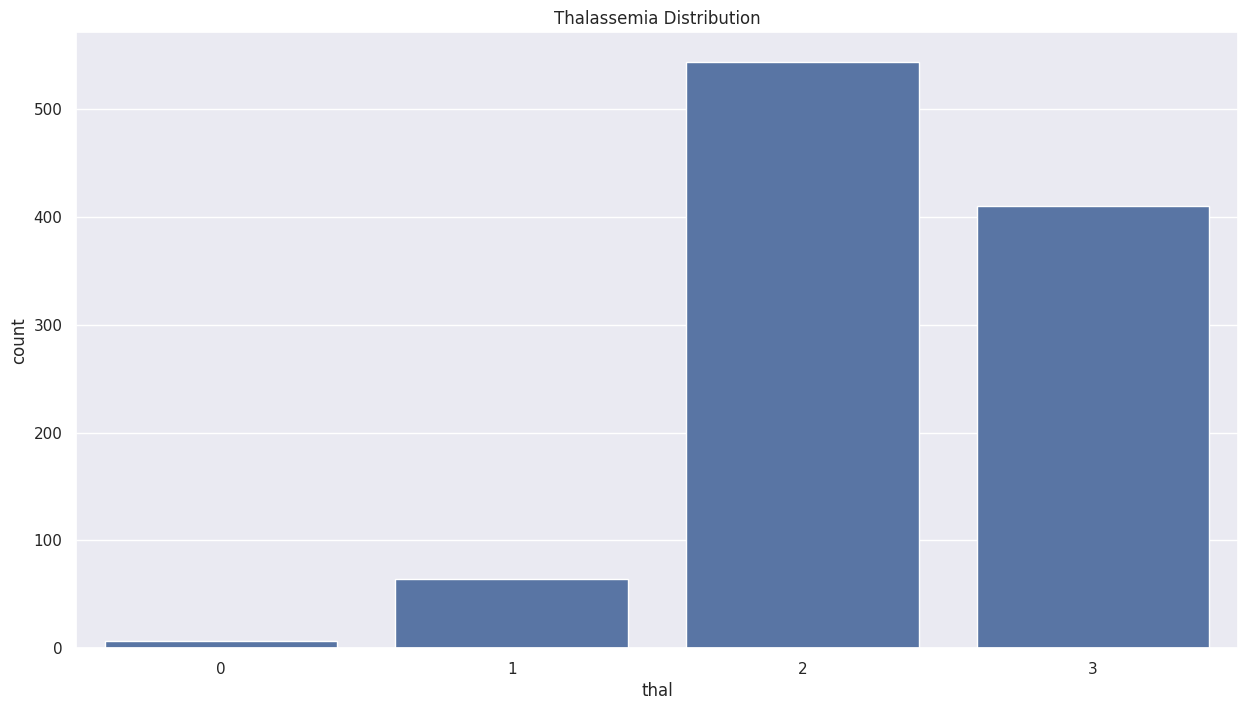

In [ ]:
sns.countplot(x='thal', data=df)
plt.title('Thalassemia Distribution')
plt.show()

Visualizing the values features of dataset over target value

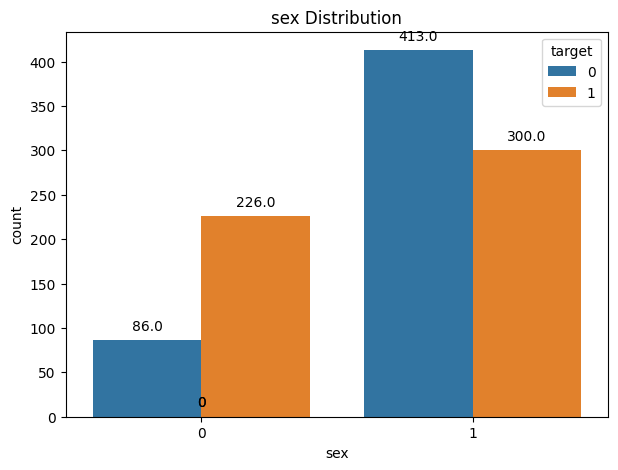

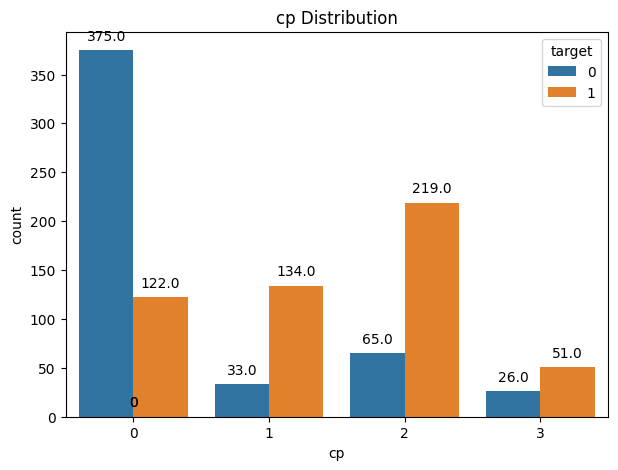

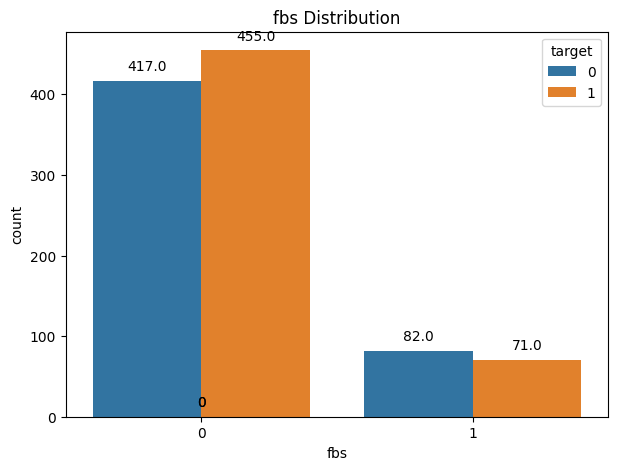

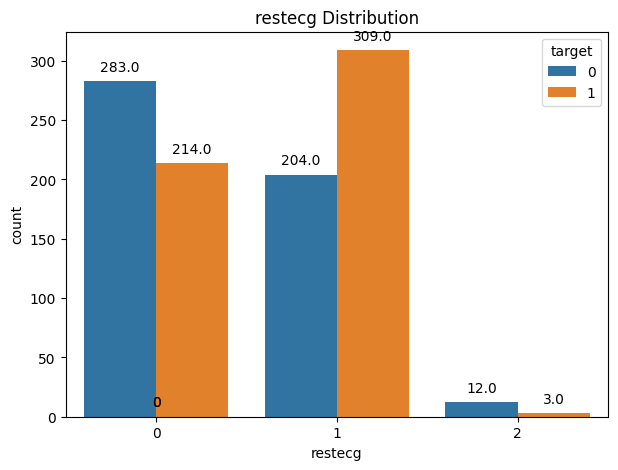

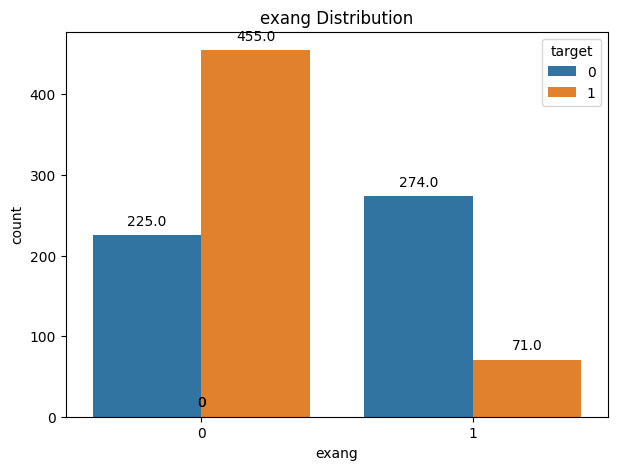

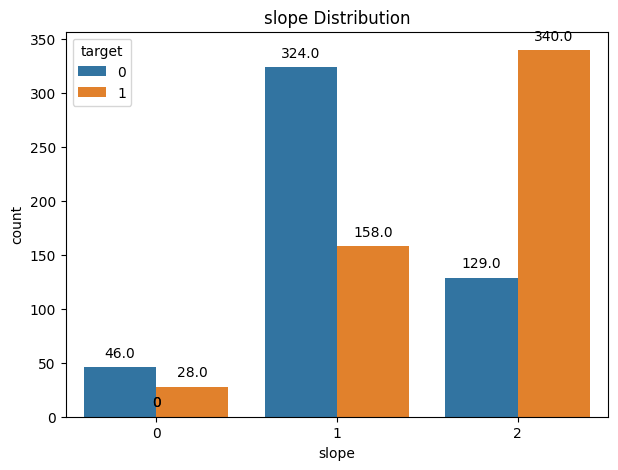

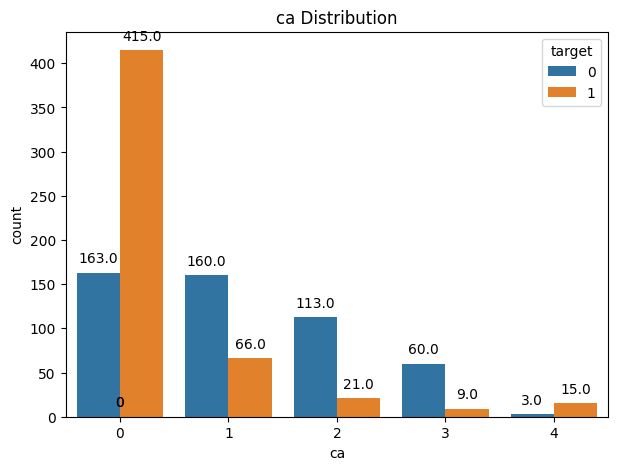

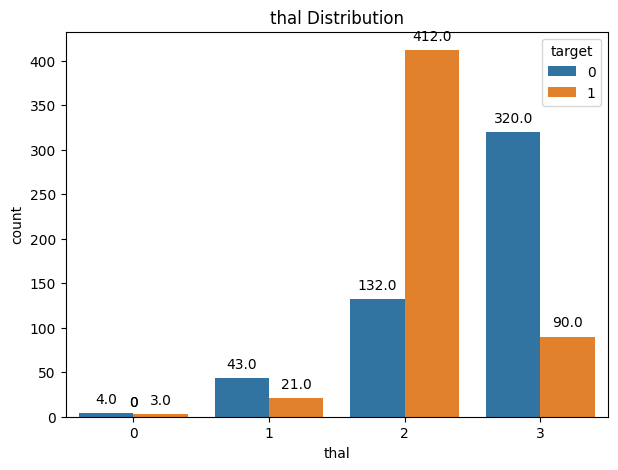

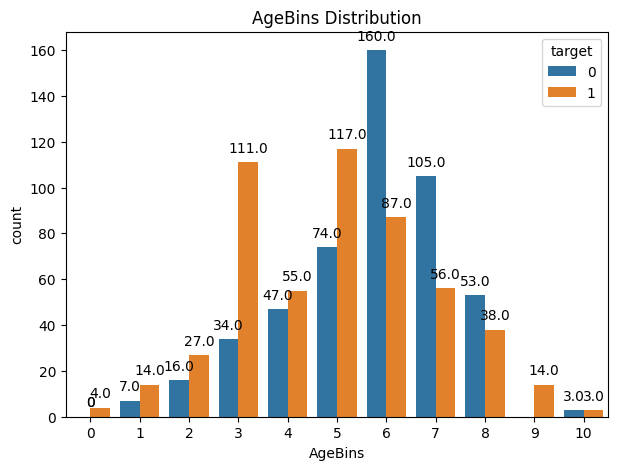

In [ ]:
def plot_value_counts(df, features, figsize=(7, 5)):
    for feature in features:
        plt.figure(figsize=figsize)  # Set the figure size
        ax = sns.countplot(x=feature, hue='target', data=df)
        plt.title(f'{feature} Distribution')

        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.show()

# Assuming df is your DataFrame
features_to_plot = ['sex', 'cp', 'fbs','restecg','exang','slope','ca','thal',
                    'AgeBins']
plot_value_counts(df, features_to_plot)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(820, 13)

In [ ]:
X_test.shape

(205, 13)

In [ ]:
Y_train.shape

(820,)

In [ ]:
Y_test.shape

(205,)

Model Fitting

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred_lr.shape

(205,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # Import the missing function

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.85 %


2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 84.88 %


3. SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(205,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 85.37 %


4. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(205,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 78.54 %


5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(205,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(205,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


7. XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(205,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


8. Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 2s 6ms/step - loss: 11.0651 - accuracy: 0.5110
Epoch 2/300
26/26 [==============================] - 0s 5ms/step - loss: 3.9791 - accuracy: 0.5146
Epoch 3/300
26/26 [==============================] - 0s 6ms/step - loss: 1.1556 - accuracy: 0.5000
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 0.9916 - accuracy: 0.4963
Epoch 5/300
26/26 [==============================] - 0s 6ms/step - loss: 0.9228 - accuracy: 0.5000
Epoch 6/300
26/26 [==============================] - 0s 8ms/step - loss: 0.8717 - accuracy: 0.4988
Epoch 7/300
26/26 [==============================] - 0s 9ms/step - loss: 0.8122 - accuracy: 0.5146
Epoch 8/300
26/26 [==============================] - 0s 8ms/step - loss: 0.7706 - accuracy: 0.5451
Epoch 9/300
26/26 [==============================] - 0s 6ms/step - loss: 0.7337 - accuracy: 0.5634
Epoch 10/300
26/26 [==============================] - 0s 6ms/step - loss: 0.6995 - accuracy: 0.5890
Epoch 11

In [ ]:
Y_pred_nn = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
Y_pred_nn.shape

(205, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.37 %


**Output final score**

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.85 %
The accuracy score achieved using Naive Bayes is: 84.88 %
The accuracy score achieved using Support Vector Machine is: 85.37 %
The accuracy score achieved using K-Nearest Neighbors is: 78.54 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 85.37 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

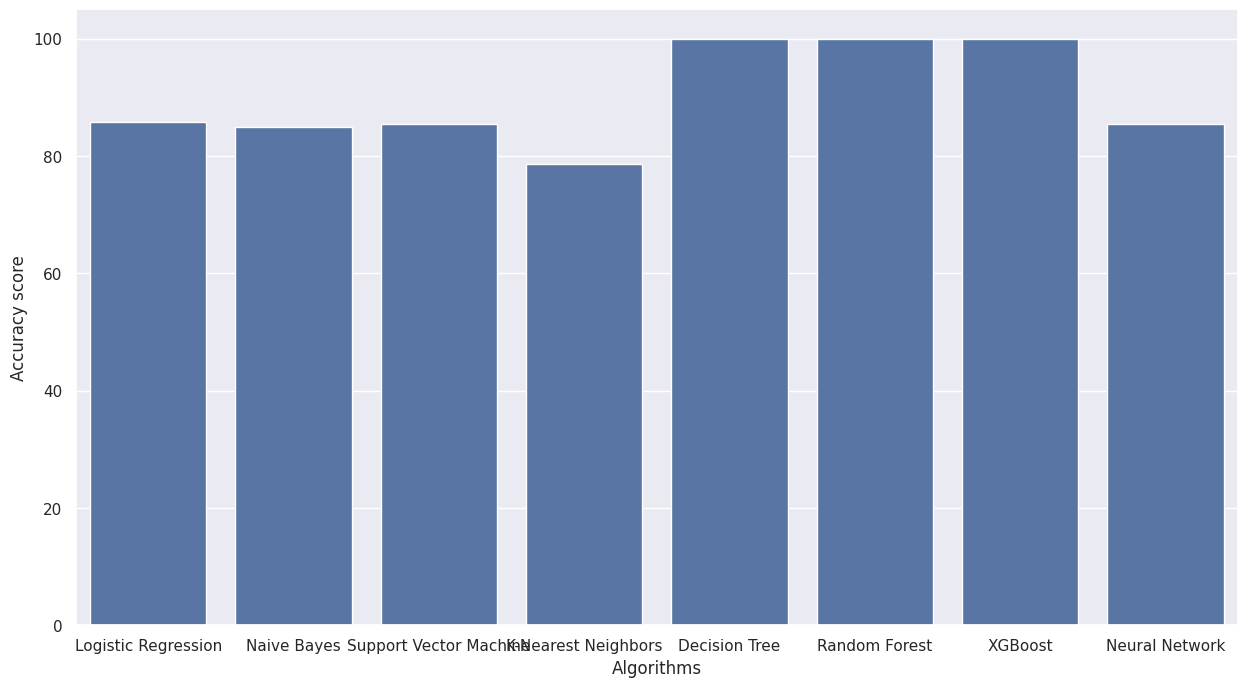

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

**Model Deployement- Predicting the Unseen Data**

In [59]:
# Now, let's make predictions on new, unseen data
new_data = pd.DataFrame({'sex': [1, 0, 1],
                         'cp': [2, 3, 1],
                         'trestbps': [120, 130, 140],
                         'chol': [200, 220, 240],
                         'fbs': [1, 0, 1],
                         'restecg': [0, 1, 0],
                         'thalach': [150, 160, 170],
                         'exang': [1, 0, 1],
                         'oldpeak': [1.5, 2.0, 2.5],
                         'slope': [1, 2, 3],
                         'ca': [0, 1, 2],
                         'thal': [2, 3, 1],
                        'AgeBins':[0,1,2]})

# Assuming you don't want to bin 'age' anymore, retrain the model:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Use the original DataFrame 'df' with the 'AgeBins' column
model_rf.fit(df.drop('target', axis=1), df['target'])

# Now predict using the new data (with the 'AgeBins' column)
new_predictions = model_rf.predict(new_data)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[1 1 1]
